In [1]:
# Importing modules
import pandas as pd
import os
#os.chdir('..')
# Read data into papers
papers = pd.read_csv('data/papers.csv')
# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [2]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
5865,2016,Online ICA: Understanding Global Dynamics of N...,Solving statistical learning problems often in...,Online ICA: Understanding Global Dynamics of\n...
6024,1992,Using hippocampal 'place cells' for navigation...,Abstract Missing,Using hippocampal 'place cells' for\nnavigatio...
3529,2011,Sparse Features for PCA-Like Linear Regression,Principal Components Analysis~(PCA) is often u...,Sparse Features for PCA-Like Linear Regression...
5734,2016,Kernel Observers: Systems-Theoretic Modeling a...,We consider the problem of estimating the late...,Kernel Observers: Systems-Theoretic Modeling a...
2277,2006,Denoising and Dimension Reduction in Feature S...,Abstract Missing,Denoising and Dimension Reduction in Feature S...


In [3]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

5865    online ica: understanding global dynamics of\n...
6024    using hippocampal 'place cells' for\nnavigatio...
3529    sparse features for pca-like linear regression...
5734    kernel observers: systems-theoretic modeling a...
2277    denoising and dimension reduction in feature s...
Name: paper_text_processed, dtype: object

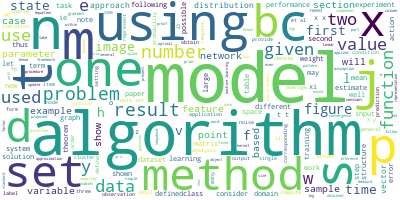

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liux5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['online', 'ica', 'understanding', 'global', 'dynamics', 'nonconvex', 'optimization', 'via', 'diffusion', 'processes', 'chris', 'junchi', 'li', 'zhaoran', 'wang', 'han', 'liu', 'department', 'operations', 'research', 'financial', 'engineering', 'princeton', 'university', 'junchil', 'zhaoran', 'hanliu', 'princetonedu', 'abstract', 'solving']


In [6]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 11), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 26), (25, 2), (26, 8), (27, 2), (28, 2), (29, 3)]


In [7]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"algorithm" + 0.006*"model" + 0.005*"data" + 0.005*"learning" + '
  '0.004*"time" + 0.004*"set" + 0.004*"number" + 0.003*"using" + '
  '0.003*"linear" + 0.003*"figure"'),
 (1,
  '0.007*"model" + 0.005*"algorithm" + 0.005*"data" + 0.004*"learning" + '
  '0.004*"using" + 0.004*"set" + 0.004*"models" + 0.004*"problem" + '
  '0.004*"time" + 0.004*"one"'),
 (2,
  '0.006*"model" + 0.005*"function" + 0.005*"learning" + 0.004*"algorithm" + '
  '0.004*"number" + 0.004*"set" + 0.004*"data" + 0.004*"using" + '
  '0.004*"matrix" + 0.003*"first"'),
 (3,
  '0.006*"data" + 0.005*"algorithm" + 0.005*"model" + 0.005*"set" + '
  '0.004*"number" + 0.004*"learning" + 0.004*"function" + 0.004*"time" + '
  '0.004*"using" + 0.004*"one"'),
 (4,
  '0.009*"model" + 0.006*"data" + 0.005*"function" + 0.005*"learning" + '
  '0.005*"using" + 0.004*"algorithm" + 0.004*"set" + 0.003*"models" + '
  '0.003*"one" + 0.003*"problem"'),
 (5,
  '0.006*"model" + 0.005*"data" + 0.005*"algorithm" + 0.005*"set" + 

In [13]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(''+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, ''+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\liux5\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.004136 -0.001503       1        1  15.558455
4      0.002081  0.002049       2        1  15.188351
0      0.005527 -0.005478       3        1  12.928495
9     -0.000571  0.008631       4        1   9.913719
6     -0.009709 -0.004081       5        1   8.829773
3     -0.001557 -0.002917       6        1   8.801079
1      0.001880  0.002681       7        1   8.717845
8     -0.003969  0.001477       8        1   8.480580
5     -0.001355  0.000643       9        1   7.120386
7      0.003538 -0.001502      10        1   4.461317, topic_info=         Term         Freq        Total Category  logprob  loglift
529     model  1415.000000  1415.000000  Default  30.0000  30.0000
746       set  1018.000000  1018.000000  Default  29.0000  29.0000
531    models   703.000000   703.000000  Default  28.0000  28.0000
846      time   769.000000   769.000000  Default  27.0000  27.0000
885     using   883.000000   883.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
336  function    33.694878  1005.817843  Topic10  -5.7257  -0.2865
580       one    27.870672   786.225679  Topic10  -5.9154  -0.2299
635   problem    25.555479   751.198455  Topic10  -6.0022  -0.2711
567    number    25.236810   754.408200  Topic10  -6.0147  -0.2879
854  training    21.619747   519.967770  Topic10  -6.1694  -0.0704

[839 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
11303      1  0.140341  abstraction
11303      2  0.140341  abstraction
11303      3  0.105256  abstraction
11303      4  0.140341  abstraction
11303      5  0.035085  abstraction
...      ...       ...          ...
9022       8  0.091706           zl
9022       9  0.091706           zl
9022      10  0.091706           zl
9023       2  0.274999          zli
9023       5  0.274999          zli

[3989 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 10, 7, 4, 2, 9, 6, 8])